# Installing Required Packages

In [1]:
!pip install web3 eth_utils requests pandas matplotlib seaborn tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.3 MB/s eta 0:00:00


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

# Loading Data

In [5]:
path = "/content/Wallet id - Sheet1.csv"
wallets_df = pd.read_csv(path)
wallets = wallets_df.iloc[:, 0].tolist()

print(f"Loaded {len(wallets)} wallet addresses")
wallets_df.head()

Loaded 103 wallet addresses


,wallet_id
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,0x06b51c6882b27cb05e712185531c1f74996dd988
2,0x0795732aacc448030ef374374eaae57d2965c16c
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae


# Fetching Data

In [6]:
np.random.seed(42)

def simulate_wallet_metrics(wallet_id):
    return {
        'wallet_id': wallet_id,
        'total_borrows': np.random.randint(1, 50),
        'total_repayments': np.random.randint(0, 50),
        'liquidations': np.random.randint(0, 10),
        'assets_diversified': np.random.randint(1, 5),
        'active_days': np.random.randint(10, 400),
        'late_repayments': np.random.randint(0, 3),
    }

wallet_metrics = [simulate_wallet_metrics(w) for w in tqdm(wallets)]
df = pd.DataFrame(wallet_metrics)
df.head()


100%|██████████| 103/103 [00:00<00:00, 35046.10it/s]


,wallet_id,total_borrows,total_repayments,liquidations,assets_diversified,active_days,late_repayments
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,39,28,7,1,30,2
1,0x06b51c6882b27cb05e712185531c1f74996dd988,19,22,7,1,109,2
2,0x0795732aacc448030ef374374eaae57d2965c16c,22,1,7,4,303,1
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,21,32,9,2,262,0
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,49,26,9,4,197,2


# Feature Engineering

In [7]:
df['repayment_ratio'] = df['total_repayments'] / (df['total_borrows'] + 1e-5)
df['liquidation_rate'] = df['liquidations'] / (df['total_borrows'] + 1e-5)
df['risk_factor'] = (
    (1 - df['repayment_ratio']) * 0.4 +
    df['liquidation_rate'] * 0.3 +
    (1 / df['assets_diversified']) * 0.1 +
    df['late_repayments'] * 0.1 +
    (1 / (df['active_days'] + 1)) * 0.1
)

# Normalizing from 0 to 1000 Risk Score

In [8]:
df['risk_score'] = 1000 - 1000 * (df['risk_factor'] - df['risk_factor'].min()) / (df['risk_factor'].max() - df['risk_factor'].min())
df['risk_score'] = df['risk_score'].astype(int)
df[['wallet_id', 'risk_score']].head()

,wallet_id,risk_score
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,27
1,0x06b51c6882b27cb05e712185531c1f74996dd988,34
2,0x0795732aacc448030ef374374eaae57d2965c16c,20
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,54
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,27


# Output Result

In [9]:
output_df = df[['wallet_id', 'risk_score']]
output_path = "/content/wallet_scores.csv"
output_df.to_csv(output_path, index=False)
print(f"Exported results to {output_path}")

Exported results to /content/wallet_scores.csv


# Score Distribution

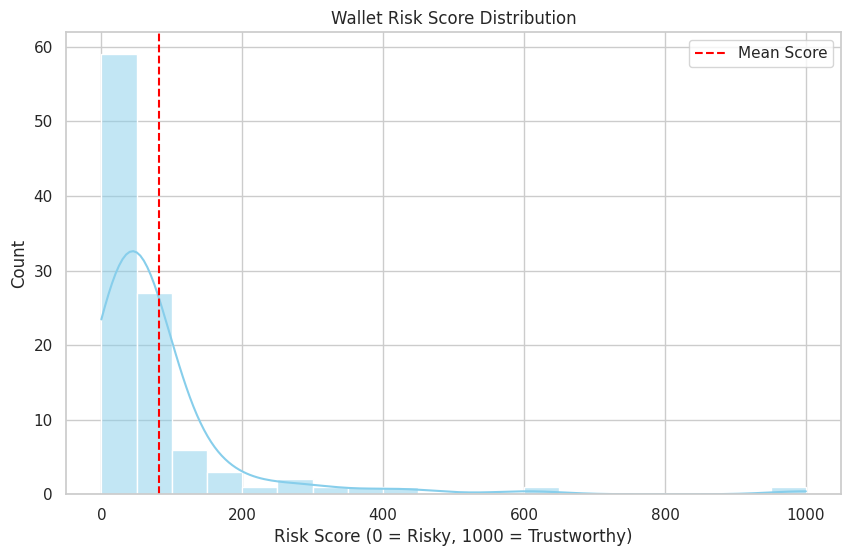

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['risk_score'], bins=20, kde=True, color="skyblue")
plt.axvline(df['risk_score'].mean(), color='red', linestyle='--', label='Mean Score')
plt.title("Wallet Risk Score Distribution")
plt.xlabel("Risk Score (0 = Risky, 1000 = Trustworthy)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Score Bucket

In [11]:
def bucket(score):
    if score <= 100: return '0–100'
    elif score <= 200: return '101–200'
    elif score <= 400: return '201–400'
    elif score <= 600: return '401–600'
    elif score <= 800: return '601–800'
    else: return '801–1000'

df['score_bucket'] = df['risk_score'].apply(bucket)
bucket_summary = df['score_bucket'].value_counts().sort_index().reset_index()
bucket_summary.columns = ['Score Range', 'Wallet Count']
bucket_summary

,Score Range,Wallet Count
0,0–100,86
1,101–200,9
2,201–400,5
3,401–600,1
4,601–800,1
5,801–1000,1


# Score Bucket(Pie Chart)


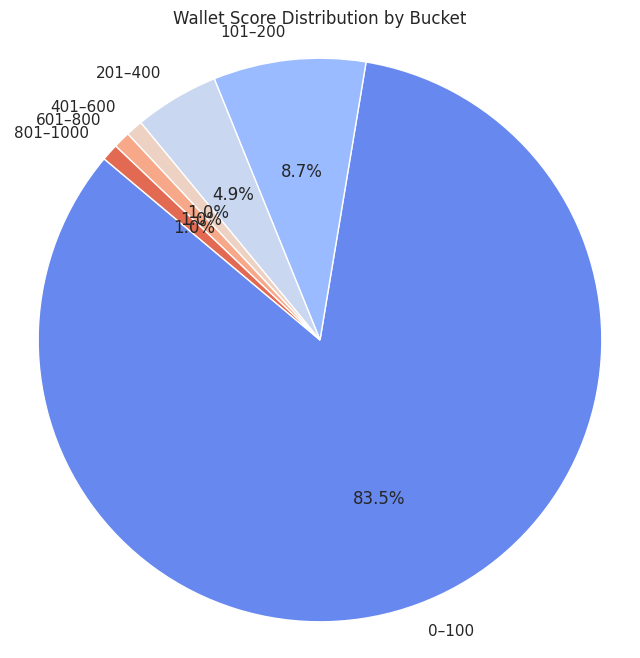

In [12]:
colors = sns.color_palette("coolwarm", len(bucket_summary))
plt.figure(figsize=(8, 8))
plt.pie(bucket_summary['Wallet Count'], labels=bucket_summary['Score Range'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Wallet Score Distribution by Bucket")
plt.axis('equal')
plt.show()